In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as st

In [5]:
# Load the Ground Truth:
foldername = "swdf_path"
dataset = "swdf"
query_type = "path"

In [6]:
times = {}

# LMKG 

In [7]:
# Loading Data for LMKG
gts_lmkg = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/gts_lmkg.npy")
preds_lmkg = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/preds_lmkg.npy")
sizes_lmkg = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/sizes_lmkg.npy")
times_lmkg = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/pred_times_lmkg.npy")

In [8]:
len(times_lmkg)

23342

In [9]:
LMKG = [np.mean(times_lmkg[sizes_lmkg ==2]), np.mean(times_lmkg[sizes_lmkg ==3]),
        np.mean(times_lmkg[sizes_lmkg ==5]),
       np.mean(times_lmkg[sizes_lmkg ==8])]

LMKG_MIN = [np.min(times_lmkg[sizes_lmkg ==2]),
            np.min(times_lmkg[sizes_lmkg ==3]),
        np.min(times_lmkg[sizes_lmkg ==5]),
       np.min(times_lmkg[sizes_lmkg ==8])]

LMKG_MAX = [np.max(times_lmkg[sizes_lmkg ==2]), np.max(times_lmkg[sizes_lmkg ==3]),
        np.max(times_lmkg[sizes_lmkg ==5]),
       np.max(times_lmkg[sizes_lmkg ==8])]

In [10]:
LMKG_MIN = [st.t.interval(0.95, len(times_lmkg[sizes_lmkg ==i])-1, loc=np.mean(times_lmkg[sizes_lmkg ==i]),
              scale=st.sem(times_lmkg[sizes_lmkg ==i]))[0] for i in (2,3,5,8)]


In [11]:
LMKG_MAX = [st.t.interval(0.95, len(times_lmkg[sizes_lmkg ==i])-1, loc=np.mean(times_lmkg[sizes_lmkg ==i]),
              scale=st.sem(times_lmkg[sizes_lmkg ==i]))[1] for i in (2,3,5,8)]

In [12]:
# Loading Data for GNCE
gts = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/gts.npy")
preds = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/preds.npy")
sizes = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/sizes.npy")
times = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/pred_times.npy")

In [13]:
np.unique(sizes)

array([2, 3, 4, 5, 6, 8, 9])

In [14]:
len(times)

23342

In [15]:
GNCE = [np.mean(times[sizes ==2]), np.mean(times[sizes ==3]),
        np.mean(times[sizes ==5]),
       np.mean(times[sizes ==8])]

GNCE_MIN = [np.min(times[sizes ==2]), np.min(times[sizes ==3]),
        np.min(times[sizes ==5]),
       np.min(times[sizes ==8])]

GNCE_MAX = [np.max(times[sizes ==2]), np.max(times[sizes ==3]),
        np.max(times[sizes ==5]),
       np.max(times[sizes ==8])]

In [16]:
GNCE_MIN = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[0] for i in (2,3,5,8)]

GNCE_MAX = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[1] for i in (2,3,5,8)]



In [17]:
# Loading Data for LSS
gts = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/gts_lss.npy")
preds = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/preds_lss.npy")
sizes = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/sizes_lss.npy")
times = np.load("../../Datasets/"+dataset+"/Results/"+query_type+"/execution_time/pred_times_lss.npy")

In [18]:
LSS = [np.mean(times[sizes ==3]), np.mean(times[sizes ==4]),
        np.mean(times[sizes ==6]),
       np.mean(times[sizes ==9])]

LSS_MIN = [np.min(times[sizes ==3]), np.min(times[sizes ==4]),
        np.min(times[sizes ==6]),
       np.min(times[sizes ==9])]

LSS_MAX = [np.max(times[sizes ==3]), np.max(times[sizes ==4]),
        np.max(times[sizes ==6]),
       np.max(times[sizes ==9])]

In [19]:
LSS_MIN = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[0] for i in (3,4,6,9)]

LSS_MAX = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[1] for i in (3,4,6,9)]



In [20]:
len(times)

22273

In [21]:
LSS

[2.023983569372268, 2.567854113594295, 3.727642156310001, 5.436202480831859]

In [23]:
np.unique(sizes)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

## CSET 

In [24]:
# Loading raw predictions
file = open('/home/tim/gcare/data/result/accuracy/' + foldername + "/" + dataset + '_cset_p0.03_s0_query_result.txt')
Lines = file.readlines()
file.close()

# Loading Lengths of Queries
data = []
with open("/home/tim/cardinality_estimator/Datasets/"+ dataset + "/"+  query_type + "/Joined_Queries.json") as f:
    test_data = json.load(f)
    data += test_data
random.Random(4).shuffle(data)
test_data = data[int(0.8 * len(data)):]

sizes_raw = np.array([len(q["triples"]) for index, q in enumerate(test_data) if index < 1000])

In [25]:
times = []
sizes = []
for i in range(0, len(Lines)-1, 2):
    query_idx = Lines[i].split(' ')[0].split('_')[-1].split('.')[0]
    eval_time = Lines[i].split(' ')[2]
    times.append(float(eval_time))
    sizes.append(sizes_raw[int(query_idx)])

print('Mean Evaluation Time: ', np.mean(times))
times = np.array(times)
sizes = np.array(sizes)

Mean Evaluation Time:  3.1839203863179075


#### Getting the corresponding Query Sizes(same for all G-Care Methods)



In [26]:
CSET = [np.mean(times[sizes ==2]), np.mean(times[sizes ==3]),
        np.mean(times[sizes ==5]),
       np.mean(times[sizes ==8])]

CSET_MIN = [np.min(times[sizes ==2]), np.min(times[sizes ==3]),
        np.min(times[sizes ==5]),
       np.min(times[sizes ==8])]

CSET_MAX = [np.max(times[sizes ==2]), np.max(times[sizes ==3]),
        np.max(times[sizes ==5]),
       np.max(times[sizes ==8])]

In [27]:
CSET_MIN = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[0] for i in (2,3,5,8)]

CSET_MAX = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[1] for i in (2,3,5,8)]



### Sum RDF 

In [28]:
file = open('/home/tim/gcare/data/result/accuracy/' + foldername + "/" + dataset + '_sumrdf_p0.03_s0_query_result.txt')
Lines = file.readlines()
file.close()

In [29]:
times = []
sizes = []
for i in range(0, len(Lines)-1, 2):
    query_idx = Lines[i].split(' ')[0].split('_')[-1].split('.')[0]
    eval_time = Lines[i].split(' ')[2]
    times.append(float(eval_time))
    sizes.append(sizes_raw[int(query_idx)])

print('Mean Evaluation Time: ', np.mean(times))
times = np.array(times)
sizes = np.array(sizes)

Mean Evaluation Time:  102.70555430700001


In [30]:
SUMRDF = [np.mean(times[sizes ==2]), np.mean(times[sizes ==3]),
        np.mean(times[sizes ==5]),
       np.mean(times[sizes ==8])]

SUMRDF_MIN = [np.min(times[sizes ==2]), np.min(times[sizes ==3]),
        np.min(times[sizes ==5]),
       np.min(times[sizes ==8])]

SUMRDF_MAX = [np.max(times[sizes ==2]), np.max(times[sizes ==3]),
        np.max(times[sizes ==5]),
       np.max(times[sizes ==8])]


In [31]:
SUMRDF_MIN = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[0] for i in (2,3,5,8)]

SUMRDF_MAX = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[1] for i in (2,3,5,8)]



In [32]:
if dataset == 'yago':
    SUMRDF = [0,0,0,0]
    SUMRDF_MIN = [0,0,0,0]
    SUMRDF_MAX = [0,0,0,0]

### IMPR

In [33]:
file = open('/home/tim/gcare/data/result/accuracy/' + foldername + "/" + dataset + '_impr_p0.03_s0_query_result.txt')
Lines = file.readlines()
file.close()

In [34]:
times = []
sizes = []
for i in range(0, len(Lines)-1, 2):
    query_idx = Lines[i].split(' ')[0].split('_')[-1].split('.')[0]
    eval_time = Lines[i].split(' ')[2]
    times.append(float(eval_time))
    sizes.append(sizes_raw[int(query_idx)])

print('Mean Evaluation Time: ', np.mean(times))
times = np.array(times)
sizes = np.array(sizes)

Mean Evaluation Time:  1.6977787297999998


In [35]:
IMPR = [np.mean(times[sizes ==2]), np.mean(times[sizes ==3]),
        np.mean(times[sizes ==5]),
       np.mean(times[sizes ==8])]

IMPR_MIN = [np.min(times[sizes ==2]), np.min(times[sizes ==3]),
        np.min(times[sizes ==5]),
       np.min(times[sizes ==8])]

IMPR_MAX = [np.max(times[sizes ==2]), np.max(times[sizes ==3]),
        np.max(times[sizes ==5]),
       np.max(times[sizes ==8])]

In [36]:
IMPR_MIN = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[0] for i in (2,3,5,8)]

IMPR_MAX = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[1] for i in (2,3,5,8)]



In [37]:
IMPR = [i * 30 for i in IMPR]
IMPR_MIN = [i * 30 for i in IMPR_MIN]
IMPR_MAX = [i * 30 for i in IMPR_MAX]

In [38]:
IMPR

[1.4005575, 58.428229160256414, 41.31103159999999, 49.30143339204546]

## JSUB 

In [39]:
file = open('/home/tim/gcare/data/result/accuracy/' + foldername + "/" + dataset + '_jsub_p0.03_s0_query_result.txt')
Lines = file.readlines()
file.close()

In [40]:
times = []
sizes = []
for i in range(0, len(Lines)-1, 2):
    query_idx = Lines[i].split(' ')[0].split('_')[-1].split('.')[0]
    eval_time = Lines[i].split(' ')[2]
    times.append(float(eval_time))
    sizes.append(sizes_raw[int(query_idx)])

print('Mean Evaluation Time: ', np.mean(times))
times = np.array(times)
sizes = np.array(sizes)

Mean Evaluation Time:  0.28642235829999996


In [41]:
JSUB = [np.mean(times[sizes ==2]), np.mean(times[sizes ==3]),
        np.mean(times[sizes ==5]),
       np.mean(times[sizes ==8])]

JSUB_MIN = [np.min(times[sizes ==2]), np.min(times[sizes ==3]),
        np.min(times[sizes ==5]),
       np.min(times[sizes ==8])]

JSUB_MAX = [np.max(times[sizes ==2]), np.max(times[sizes ==3]),
        np.max(times[sizes ==5]),
       np.max(times[sizes ==8])]

In [42]:
JSUB_MIN = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[0] for i in (2,3,5,8)]

JSUB_MAX = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[1] for i in (2,3,5,8)]

JSUB = [i * 30 for i in JSUB]
JSUB_MIN = [i * 30 for i in JSUB_MIN]
JSUB_MAX = [i * 30 for i in JSUB_MAX]

### WJOIN 

In [43]:
file = open('/home/tim/gcare/data/result/accuracy/' + foldername + "/" + dataset + '_wj_p0.03_s0_query_result.txt')
Lines = file.readlines()
file.close()

In [44]:
times = []
sizes = []
for i in range(0, len(Lines)-1, 2):
    query_idx = Lines[i].split(' ')[0].split('_')[-1].split('.')[0]
    eval_time = Lines[i].split(' ')[2]
    times.append(float(eval_time))
    sizes.append(sizes_raw[int(query_idx)])

print('Mean Evaluation Time: ', np.mean(times))
times = np.array(times)
sizes = np.array(sizes)

Mean Evaluation Time:  0.573153311


In [45]:
WJOIN = [np.mean(times[sizes ==2]), np.mean(times[sizes ==3]),
        np.mean(times[sizes ==5]),
       np.mean(times[sizes ==8])]

WJOIN_MIN = [np.min(times[sizes ==2]), np.min(times[sizes ==3]),
        np.min(times[sizes ==5]),
       np.min(times[sizes ==8])]

WJOIN_MAX = [np.max(times[sizes ==2]), np.max(times[sizes ==3]),
        np.max(times[sizes ==5]),
       np.max(times[sizes ==8])]

In [46]:
WJOIN_MIN = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[0] for i in (2,3,5,8)]

WJOIN_MAX = [st.t.interval(0.95, len(times[sizes ==i])-1, loc=np.mean(times[sizes ==i]),
              scale=st.sem(times[sizes ==i]))[1] for i in (2,3,5,8)]

WJOIN = [i * 30 for i in WJOIN]
WJOIN_MIN = [i * 30 for i in WJOIN_MIN]
WJOIN_MAX = [i * 30 for i in WJOIN_MAX]

### Final Barplot

In [47]:
import matplotlib as mpl
from cycler import cycler

bar_cycle = (cycler('hatch', ['//////', '-----', '...','oooo', 'xxx','**', 'OOO', '\\\\']))
styles = bar_cycle()

colormap = mpl.cm.tab10.colors

/tmp/ipykernel_40125/3220874644.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,6500)


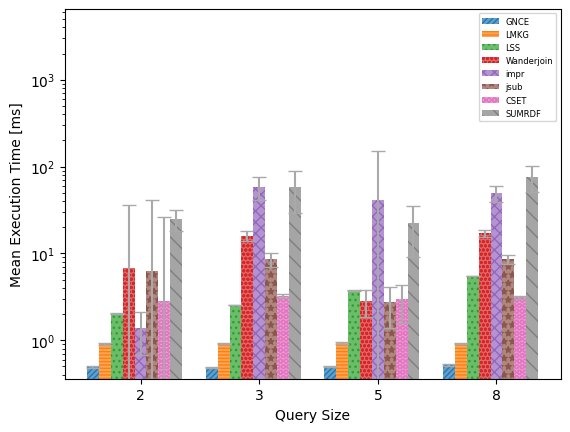

In [48]:
X_Axis = np.arange(len(GNCE))

data = [GNCE, LMKG, LSS, WJOIN, IMPR, JSUB, CSET, SUMRDF]
if dataset == 'yago':
    labels = ['GNCE', 'LMKG', 'LSS', 'Wanderjoin', 'impr', 'jsub', 'CSET', '']
else:
    labels = ['GNCE', 'LMKG', 'LSS', 'Wanderjoin', 'impr', 'jsub', 'CSET', 'SUMRDF']


#labels = ['GNCE', 'LMKG', 'LSS', 'CSET', 'SUMRDF', 'IMPR', 'JSUB', 'WJOIN']
datamin = [GNCE_MIN, LMKG_MIN, LSS_MIN, WJOIN_MIN, IMPR_MIN, JSUB_MIN, CSET_MIN, SUMRDF_MIN]
datamax = [GNCE_MAX, LMKG_MAX, LSS_MAX, WJOIN_MAX, IMPR_MAX, JSUB_MAX, CSET_MAX, SUMRDF_MAX]


#data = [GNCE, LMKG, LSS, CSET, IMPR, JSUB, WJOIN]
#labels = ['GNCE', 'LMKG', 'LSS', 'CSET', 'IMPR', 'JSUB', 'WJOIN']
#datamin = [GNCE_MIN, LMKG_MIN, LSS_MIN, CSET_MIN, IMPR_MIN, JSUB_MIN, WJOIN_MIN]
#datamax = [GNCE_MAX, LMKG_MAX, LSS_MAX, CSET_MAX, IMPR_MAX, JSUB_MAX, WJOIN_MAX]

min_offset = int(len(data)/2) * 0.1

for i in range(len(data)):
    hatch_color = list(colormap[i])
    plt.rcParams['hatch.color'] = colormap[i]
    mins = list(np.array(data[i]) - np.array(datamin[i]))
    maxs = list(np.array(datamax[i]) - np.array(data[i]))

    errs = np.array([[mins[j], maxs[j]] for j in range(len(datamax[i]))]).T
    plt.bar(X_Axis - min_offset + i*0.1, data[i], 
            0.1, label= labels[i],
            color=colormap[i], alpha=0.7,
            yerr = errs,
            capsize=5,
            ecolor = 'darkgrey',
            **next(styles))


#plt.bar(X_Axis - 0.1,GNCE, 0.1, label="GNCE")
#plt.bar(X_Axis - 0.0,LMKG, 0.1, label="LMKG")
#plt.bar(X_Axis + 0.1,LSS, 0.1, label="LSS")
plt.legend(prop={'size': 6})
plt.yscale("log")
plt.xticks(X_Axis, ["2", "3", "5", "8"])
plt.xlabel("Query Size")
plt.ylabel("Mean Execution Time [ms]")
plt.ylim(0,6500)
plt.savefig(dataset+ "_"+ query_type + "_execution_times.pdf")